<a href="https://colab.research.google.com/github/Mahima2208/EDA_PlayStore_Apps_Analysis/blob/main/MAHIMA_PHALKEY_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## **KNOWING THE DATASETS:**


*   # **PLAYSTORE DATASET:**

> In this dataset there are total 10,841 rows.
1.   App: Name of the application.
2.   Category: Apps are divided into different categories that categories are mention in this column.
3.   Rating: Rating is been given out of 5 which is calculated as the avg ratings given by the user.
4.   Reviews: Number of reviews received from the user.
5.   Size: Memory Size of the application.
6.   Installs: The number of installions of that paricular application.
7.   Type: Whether that app is paid or free of cost.
8.   Price: Price of the app if not free.
9.   Content Rating: This column specifies who can access this application that can be teen,everyone,mature 17+
10. Genres: The sub category of the application.
11. Last Updated: The last updated date of the app.
12. Current Version: Latest version of the app.
13. Android Version: Minimum Android version supported by the app


* # **USER REVIEWS DATASET:**


> In this dataset there are total 64,295 rows.
  1. App: Name of the application.
  2. Translated Review: Review in English by the user.
  3. Sentiment: The result of the review eitherPositive or Negative.
  4. Sentiment Polarity: It expresses the sentiment which ranges between -1 to 1 where -1 represents negative review and 1 represents positive and others depend on the type of review.
  5. Sentiment Subjectivity: This value ranges between 0 to 1. Lower values indicates factual information and higher values represent values inficates personal or public opinions.



# **IMPORTING THE NECESSARY LIBRARIES**

In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
color = sns.color_palette()

import warnings
warnings.filterwarnings('ignore')

## **MOUNTING THE PLAYSTORE DATASET INTO OUR COLLAB NOTEBOOK**

In [98]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [99]:
path='/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/EDA/Play Store App Review Analysis/Play Store Data.csv'
playstore_df= pd.read_csv(path)

## **DATA EXPLORATION**

In [100]:
playstore_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [101]:
playstore_df.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


## **MOUNTING THE USER REVIEWS DATASET INTO OUR COLLAB NOTEBOOK**

In [102]:
path_userRatings='/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/EDA/Play Store App Review Analysis/User Reviews.csv'
userRatings_df= pd.read_csv(path_userRatings)

## **DATA EXPLORATION**

In [103]:
userRatings_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [104]:
userRatings_df.tail(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64289,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [105]:
playstore_df.shape

(10841, 13)

In [106]:
userRatings_df.shape

(64295, 5)

## **DATA CLEANING**

In [107]:
playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [108]:
userRatings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [109]:
playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [110]:
userRatings_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [111]:
missing_values_count=playstore_df.isnull().sum()
missing_values_count

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [112]:
# how many total missing values do we have?
total_cells = np.product(playstore_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

1.0551112940191438

In [113]:
missing_values_count_user=userRatings_df.isnull().sum()
missing_values_count_user

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [114]:
# how many total missing values do we have?
total_cells = np.product(playstore_df.shape)
total_missing = missing_values_count_user.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

76.24686907963358

In [115]:
def replace_na_with_median(data):
  playstore_df[data].fillna(round(playstore_df[data].median(),2),inplace=True)

In [116]:
replace_na_with_median('Rating')

In [117]:
playstore_df[playstore_df['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [118]:
def replace_na_with_mode(data):
  playstore_df[data].fillna(playstore_df[data].mode()[0],inplace=True)


In [119]:
#playstore_df['Type'].fillna(playstore_df['Type'].mode()[0],inplace=True)
replace_na_with_mode('Type')
replace_na_with_mode('Content Rating')
replace_na_with_mode('Android Ver')
replace_na_with_mode('Current Ver')

In [120]:
playstore_df[playstore_df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [121]:
playstore_df[playstore_df['App']=='Life Made WI-Fi Touchscreen Photo Frame']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


In [122]:
missing_values_count=playstore_df.isnull().sum()
missing_values_count

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [123]:
playstore_df[playstore_df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [124]:
#playstore_df.drop_duplicates(subset='App',keep='first',inplace=True,ignore_index=True)
playstore_df['Installs']=playstore_df['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
playstore_df['Installs']=playstore_df['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
#playstore_withoutduplicates_df=playstore_df.groupby('App')['Current Ver'].max().reset_index()
playstore_df = playstore_df[~(playstore_df['Installs'] == "Free")].reset_index(drop=True)
playstore_df['Installs']=playstore_df['Installs'].apply(lambda x: int(x)) 

In [125]:
playstore_withoutduplicates_df=playstore_df.groupby('App')['Installs'].max().reset_index()

In [126]:
playstore_withoutduplicates_df.shape

(9659, 2)

In [127]:
playstore_withoutduplicates_df.dtypes

App         object
Installs     int64
dtype: object

In [128]:
play_store_df_1=playstore_withoutduplicates_df.merge(playstore_df,on=['App','Installs'])

In [129]:
play_store_df_1

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",500,SPORTS,4.3,27,3.6M,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,1000000,SOCIAL,4.5,40467,22M,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,10000,COMICS,3.5,115,9.1M,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,10000,TOOLS,4.5,259,203k,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,10000,COMMUNICATION,4.7,573,53M,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10816,"뽕티비 - 개인방송, 인터넷방송, BJ방송",100000,VIDEO_PLAYERS,4.3,414,59M,Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
10817,💎 I'm rich,10000,LIFESTYLE,3.8,718,26M,Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
10818,"💘 WhatsLov: Smileys of love, stickers and GIF",1000000,SOCIAL,4.6,22098,18M,Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
10819,📏 Smart Ruler ↔️ cm/inch measuring for homework!,10000,TOOLS,4.0,19,3.2M,Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [130]:
play_store_df_1[play_store_df_1.duplicated('App')]

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8,10 Best Foods for You,500000,HEALTH_AND_FITNESS,4.0,2490,3.8M,Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
22,1800 Contacts - Lens Store,1000000,MEDICAL,4.7,23160,26M,Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
32,2017 EMRA Antibiotic Guide,1000,MEDICAL,4.4,12,3.8M,Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
39,21-Day Meditation Experience,100000,HEALTH_AND_FITNESS,4.4,11506,15M,Free,0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
62,365Scores - Live Scores,10000000,SPORTS,4.6,666246,25M,Free,0,Everyone,Sports,"July 29, 2018",5.5.9,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10754,"theScore: Live Sports Scores, News, Stats & Vi...",10000000,SPORTS,4.4,133833,34M,Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
10755,"theScore: Live Sports Scores, News, Stats & Vi...",10000000,SPORTS,4.4,133833,34M,Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
10761,trivago: Hotels & Travel,50000000,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
10762,trivago: Hotels & Travel,50000000,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


In [131]:
play_store_df_1.drop_duplicates(subset='App',keep='first',inplace=True,ignore_index=True)

In [132]:
play_store_df_1

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",500,SPORTS,4.3,27,3.6M,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,1000000,SOCIAL,4.5,40467,22M,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,10000,COMICS,3.5,115,9.1M,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,10000,TOOLS,4.5,259,203k,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,10000,COMMUNICATION,4.7,573,53M,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,"뽕티비 - 개인방송, 인터넷방송, BJ방송",100000,VIDEO_PLAYERS,4.3,414,59M,Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
9655,💎 I'm rich,10000,LIFESTYLE,3.8,718,26M,Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
9656,"💘 WhatsLov: Smileys of love, stickers and GIF",1000000,SOCIAL,4.6,22098,18M,Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
9657,📏 Smart Ruler ↔️ cm/inch measuring for homework!,10000,TOOLS,4.0,19,3.2M,Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [133]:
play_store_df_1[play_store_df_1.duplicated('App')]

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


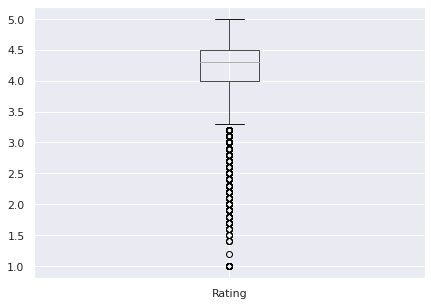

In [134]:
play_store_df_1.boxplot('Rating',figsize=(7,5))

In [135]:
play_store_df_1[play_store_df_1['Rating']<1]

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [136]:
play_store_df_1[play_store_df_1['Rating']>5]

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [137]:
play_store_df_1.drop([5806],inplace=True)

In [138]:
play_store_df_1[play_store_df_1['Rating']>5]

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


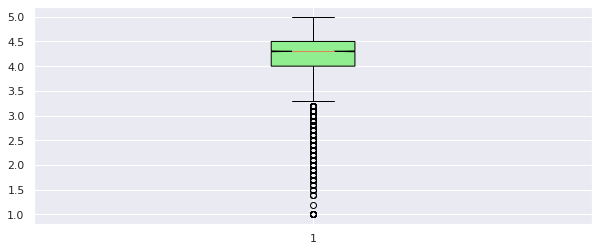

In [139]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
all_data=play_store_df_1['Rating']
bplot1 = ax1.boxplot(all_data,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True  # fill with color
                     ) 
colors=['lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
  patch.set_facecolor(color)

    

In [140]:
play_store_df_1.head()

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",500,SPORTS,4.3,27,3.6M,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
1,+Download 4 Instagram Twitter,1000000,SOCIAL,4.5,40467,22M,Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
2,- Free Comics - Comic Apps,10000,COMICS,3.5,115,9.1M,Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
3,.R,10000,TOOLS,4.5,259,203k,Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4,/u/app,10000,COMMUNICATION,4.7,573,53M,Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up


In [141]:
play_store_df_1[play_store_df_1['Price']=='Everyone']

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [142]:
play_store_df_1['Price']=play_store_df_1['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
play_store_df_1['Price']=play_store_df_1['Price'].apply(lambda x: float(x))
play_store_df_1 = play_store_df_1[~(play_store_df_1['Price'] == "Everyone")].reset_index(drop=True) 

In [143]:
play_store_df_1[play_store_df_1['Price']=='Everyone']

,App,Installs,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [144]:
play_store_df_1 = play_store_df_1[~(play_store_df_1['Size'] == "Varies with device")].reset_index(drop=True)
play_store_df_1['Size']=play_store_df_1['Size'].apply(lambda x: str(x).replace('M','').replace('+','').replace(',','') if 'M' in str(x) else x)

play_store_df_1['Size']=play_store_df_1['Size'].apply(lambda x: float(str(x).replace('k',''))/1024 if 'k' in str(x) else x)

play_store_df_1['Size']=round(play_store_df_1['Size'].astype(float),2)
play_store_df_1['Reviews']=play_store_df_1['Reviews'].astype(int)
play_store_df_1.rename(columns={'Size':'Size in MB'},inplace=True)

In [145]:
play_store_df_1['Android Ver']=play_store_df_1['Android Ver'].apply(lambda x: str(x).replace('and up','') if 'and up' in str(x) else x)

In [146]:
play_store_df_1['Last Updated'] = pd.to_datetime(play_store_df_1['Last Updated'])

In [147]:
play_store_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8429 entries, 0 to 8428
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             8429 non-null   object        
 1   Installs        8429 non-null   int64         
 2   Category        8429 non-null   object        
 3   Rating          8429 non-null   float64       
 4   Reviews         8429 non-null   int64         
 5   Size in MB      8429 non-null   float64       
 6   Type            8429 non-null   object        
 7   Price           8429 non-null   float64       
 8   Content Rating  8429 non-null   object        
 9   Genres          8429 non-null   object        
 10  Last Updated    8429 non-null   datetime64[ns]
 11  Current Ver     8429 non-null   object        
 12  Android Ver     8429 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 856.2+ KB


In [148]:
play_store_df_1

,App,Installs,Category,Rating,Reviews,Size in MB,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",500,SPORTS,4.3,27,3.6,Free,0.00,Everyone,Sports,2017-10-07,0.22,4.1
1,+Download 4 Instagram Twitter,1000000,SOCIAL,4.5,40467,22.0,Free,0.00,Everyone,Social,2018-08-02,5.03,4.1
2,- Free Comics - Comic Apps,10000,COMICS,3.5,115,9.1,Free,0.00,Mature 17+,Comics,2018-07-13,5.0.12,5.0
3,.R,10000,TOOLS,4.5,259,0.2,Free,0.00,Everyone,Tools,2014-09-16,1.1.06,1.5
4,/u/app,10000,COMMUNICATION,4.7,573,53.0,Free,0.00,Mature 17+,Communication,2018-07-03,4.2.4,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8424,"뽕티비 - 개인방송, 인터넷방송, BJ방송",100000,VIDEO_PLAYERS,4.3,414,59.0,Free,0.00,Mature 17+,Video Players & Editors,2018-07-18,4.0.7,4.0.3
8425,💎 I'm rich,10000,LIFESTYLE,3.8,718,26.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4
8426,"💘 WhatsLov: Smileys of love, stickers and GIF",1000000,SOCIAL,4.6,22098,18.0,Free,0.00,Everyone,Social,2018-07-24,4.2.4,4.0.3
8427,📏 Smart Ruler ↔️ cm/inch measuring for homework!,10000,TOOLS,4.0,19,3.2,Free,0.00,Everyone,Tools,2017-10-21,1.0,4.2


### **Data Analysis**

In [149]:
play_store_df_1

,App,Installs,Category,Rating,Reviews,Size in MB,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",500,SPORTS,4.3,27,3.6,Free,0.00,Everyone,Sports,2017-10-07,0.22,4.1
1,+Download 4 Instagram Twitter,1000000,SOCIAL,4.5,40467,22.0,Free,0.00,Everyone,Social,2018-08-02,5.03,4.1
2,- Free Comics - Comic Apps,10000,COMICS,3.5,115,9.1,Free,0.00,Mature 17+,Comics,2018-07-13,5.0.12,5.0
3,.R,10000,TOOLS,4.5,259,0.2,Free,0.00,Everyone,Tools,2014-09-16,1.1.06,1.5
4,/u/app,10000,COMMUNICATION,4.7,573,53.0,Free,0.00,Mature 17+,Communication,2018-07-03,4.2.4,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8424,"뽕티비 - 개인방송, 인터넷방송, BJ방송",100000,VIDEO_PLAYERS,4.3,414,59.0,Free,0.00,Mature 17+,Video Players & Editors,2018-07-18,4.0.7,4.0.3
8425,💎 I'm rich,10000,LIFESTYLE,3.8,718,26.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4
8426,"💘 WhatsLov: Smileys of love, stickers and GIF",1000000,SOCIAL,4.6,22098,18.0,Free,0.00,Everyone,Social,2018-07-24,4.2.4,4.0.3
8427,📏 Smart Ruler ↔️ cm/inch measuring for homework!,10000,TOOLS,4.0,19,3.2,Free,0.00,Everyone,Tools,2017-10-21,1.0,4.2


In [150]:
play_store_df_1.describe()

,Installs,Rating,Reviews,Size in MB,Price
count,8.429000e+03,8429.000000,8.429000e+03,8429.000000,8429.000000
mean,3.731302e+06,4.183865,1.208443e+05,20.400326,1.224038
std,2.483882e+07,0.512789,9.366058e+05,21.830496,18.031324
min,0.000000e+00,1.000000,0.000000e+00,0.010000,0.000000
25%,1.000000e+03,4.000000,1.700000e+01,4.600000,0.000000
50%,5.000000e+04,4.300000,4.780000e+02,12.000000,0.000000
75%,1.000000e+06,4.500000,1.567400e+04,28.000000,0.000000
max,1.000000e+09,5.000000,4.489172e+07,100.000000,400.000000


### **With Rating==5 Data Aanalysis**

In [151]:
highest_rating_df=play_store_df_1[play_store_df_1['Rating']==5]

In [152]:
highest_rating_df

,App,Installs,Category,Rating,Reviews,Size in MB,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
33,211:CK,10,GAME,5.0,8,38.00,Paid,0.99,Teen,Arcade,2018-04-11,1.3,4.1
47,30WPM Amateur ham radio Koch CW Morse code tra...,10,FAMILY,5.0,1,3.70,Paid,1.49,Everyone,Education,2018-05-18,2.0.2,2.1
69,420 BZ Budeze Delivery,100,MEDICAL,5.0,2,11.00,Free,0.00,Mature 17+,Medical,2018-06-06,1.0.1,4.1
104,A-Y Collection,100,SHOPPING,5.0,2,2.90,Free,0.00,Teen,Shopping,2018-02-16,1.2,4.1
135,AC DC Power Monitor,10,LIFESTYLE,5.0,1,1.20,Paid,3.04,Everyone,Lifestyle,2016-05-29,1.2,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8248,ei Calc,10,TOOLS,5.0,2,19.00,Free,0.00,Everyone,Tools,2015-10-12,1.2.2,2.3
8273,i am EB,10,PHOTOGRAPHY,5.0,1,5.40,Free,0.00,Teen,Photography,2017-02-01,1.0,4.1
8280,iCard BD Plus,500,SOCIAL,5.0,2,2.40,Free,0.00,Everyone,Social,2016-07-15,3.7.5,2.0
8296,iReadMe,100,PRODUCTIVITY,5.0,8,22.00,Free,0.00,Everyone,Productivity,2018-03-06,1.5,4.4


In [153]:
highest_rating_df.shape

(266, 13)

In [154]:
highest_rating_df.groupby('Category')['Rating'].count().reset_index().max()

Category    TRAVEL_AND_LOCAL
Rating                    65
dtype: object

In [155]:
play_store_df_1.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(5)

Category
EVENTS             4.419298
EDUCATION          4.368182
ART_AND_DESIGN     4.358065
PARENTING          4.338889
PERSONALIZATION    4.319943
Name: Rating, dtype: float64

In [156]:
play_store_df_1['Reviews'].max()

44891723

In [157]:
play_store_df_1['Installs'].max()

1000000000

In [158]:
play_store_df_1.groupby('Category')['Reviews'].mean().sort_values(ascending=False).head(5)

Category
GAME             600807.032073
COMMUNICATION    189678.706612
VIDEO_PLAYERS    182113.385827
PHOTOGRAPHY      173422.648649
ENTERTAINMENT    157911.734375
Name: Reviews, dtype: float64

In [159]:
play_store_df_1['Size in MB'].value_counts().max()

182

In [160]:
play_store_df_1['Type'].value_counts()

Free    7746
Paid     683
Name: Type, dtype: int64

In [161]:
play_store_df_1[play_store_df_1['Type']=='Paid']

,App,Installs,Category,Rating,Reviews,Size in MB,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9,10 WPM Amateur ham radio CW Morse code trainer,100,COMMUNICATION,3.5,10,3.80,Paid,1.49,Everyone,Communication,2018-05-12,2.1.4,2.1
10,"10,000 Quotes DB (Premium)",500,BOOKS_AND_REFERENCE,4.1,70,3.50,Paid,0.99,Everyone,Books & Reference,2013-08-30,1.3,2.1
19,17th Edition Cable Sizer,1000,BOOKS_AND_REFERENCE,4.4,47,1.40,Paid,3.08,Everyone,Books & Reference,2016-05-27,1.22,2.2
23,2 Amateur ham radio CW Morse code practice key...,100,COMMUNICATION,4.8,6,3.50,Paid,1.49,Everyone,Communication,2018-03-05,1.0.9,1.6
27,2017 EMRA Antibiotic Guide,1000,MEDICAL,4.4,12,3.80,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8392,weather HD,10000,PERSONALIZATION,4.0,1546,4.50,Paid,1.99,Everyone,Personalization,2014-02-26,3.1,2.1
8396,¡Ay Caramba!,1,FAMILY,4.3,0,0.54,Paid,1.99,Everyone,Education,2014-06-13,1.2,3.0
8399,Égalité et Réconciliation,500,NEWS_AND_MAGAZINES,4.9,58,3.80,Paid,2.99,Everyone,News & Magazines,2018-05-26,1.1.1,5.0
8404,Билеты ПДД CD 2019 PRO,100,AUTO_AND_VEHICLES,4.3,21,16.00,Paid,1.49,Everyone,Auto & Vehicles,2018-07-27,1.49,4.0


In [162]:
app_name_with_highest_price=play_store_df_1[play_store_df_1['Price'].max()==play_store_df_1['Price']]['App'].index
play_store_df_1['App'][app_name_with_highest_price]

4756    I'm Rich - Trump Edition
Name: App, dtype: object

In [163]:
play_store_df_1['Price'].max()

400.0

In [164]:
app_name_with_highest_review=play_store_df_1[play_store_df_1['Reviews'].max()==play_store_df_1['Reviews']]['App'].index
play_store_df_1['App'][app_name_with_highest_review]

2315    Clash of Clans
Name: App, dtype: object

In [165]:
index_of_maximum_reviews=play_store_df_1['Reviews'].sort_values(ascending=False).head().index
play_store_df_1.iloc[index_of_maximum_reviews]['App']

2315                                 Clash of Clans
7111                                 Subway Surfers
2312                                   Clash Royale
2139                               Candy Crush Saga
7619    UC Browser - Fast Download Private & Secure
Name: App, dtype: object

In [166]:
#play_store_df_1.describe()

apps_with_greatest_price=play_store_df_1.loc[play_store_df_1['Price']>=300]
apps_with_greatest_price.loc[:,['App','Category']]

,App,Category
3631,Eu Sou Rico,FINANCE
4728,I AM RICH PRO PLUS,FINANCE
4730,I Am Rich,FAMILY
4731,I Am Rich Premium,FINANCE
4732,I Am Rich Pro,FAMILY
4744,I am Rich,FINANCE
4746,I am Rich Plus,FAMILY
4748,I am Rich!,FINANCE
4749,I am extremely Rich,LIFESTYLE
4750,I am rich,LIFESTYLE


In [167]:
apps_with_greatest_price.groupby('App')['Installs'].sum().reset_index()

,App,Installs
0,Eu Sou Rico,0
1,I AM RICH PRO PLUS,1000
2,I Am Rich,10000
3,I Am Rich Premium,50000
4,I Am Rich Pro,5000
5,I am Rich,5000
6,I am Rich Plus,10000
7,I am Rich!,1000
8,I am extremely Rich,1000
9,I am rich,100000


### **DATA VISUALIZATION**

In [168]:
play_store_df_1

,App,Installs,Category,Rating,Reviews,Size in MB,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",500,SPORTS,4.3,27,3.6,Free,0.00,Everyone,Sports,2017-10-07,0.22,4.1
1,+Download 4 Instagram Twitter,1000000,SOCIAL,4.5,40467,22.0,Free,0.00,Everyone,Social,2018-08-02,5.03,4.1
2,- Free Comics - Comic Apps,10000,COMICS,3.5,115,9.1,Free,0.00,Mature 17+,Comics,2018-07-13,5.0.12,5.0
3,.R,10000,TOOLS,4.5,259,0.2,Free,0.00,Everyone,Tools,2014-09-16,1.1.06,1.5
4,/u/app,10000,COMMUNICATION,4.7,573,53.0,Free,0.00,Mature 17+,Communication,2018-07-03,4.2.4,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8424,"뽕티비 - 개인방송, 인터넷방송, BJ방송",100000,VIDEO_PLAYERS,4.3,414,59.0,Free,0.00,Mature 17+,Video Players & Editors,2018-07-18,4.0.7,4.0.3
8425,💎 I'm rich,10000,LIFESTYLE,3.8,718,26.0,Paid,399.99,Everyone,Lifestyle,2018-03-11,1.0.0,4.4
8426,"💘 WhatsLov: Smileys of love, stickers and GIF",1000000,SOCIAL,4.6,22098,18.0,Free,0.00,Everyone,Social,2018-07-24,4.2.4,4.0.3
8427,📏 Smart Ruler ↔️ cm/inch measuring for homework!,10000,TOOLS,4.0,19,3.2,Free,0.00,Everyone,Tools,2017-10-21,1.0,4.2


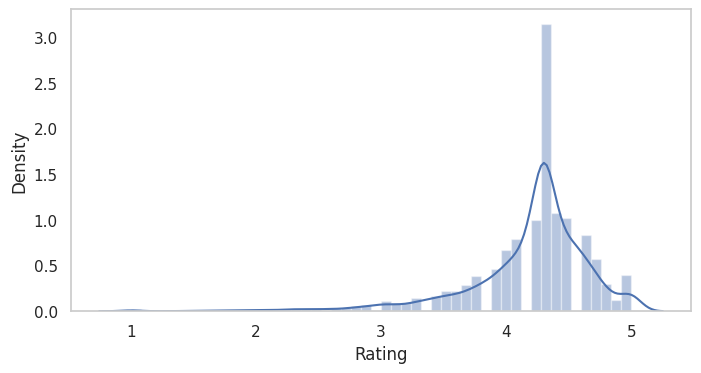

In [233]:
sns.set(rc={"figure.figsize": (8, 4)}) 
sns.set_style("whitegrid")
rating_dist=sns.distplot(play_store_df_1['Rating'],color='b')
rating_dist.grid(False)
plt.show()

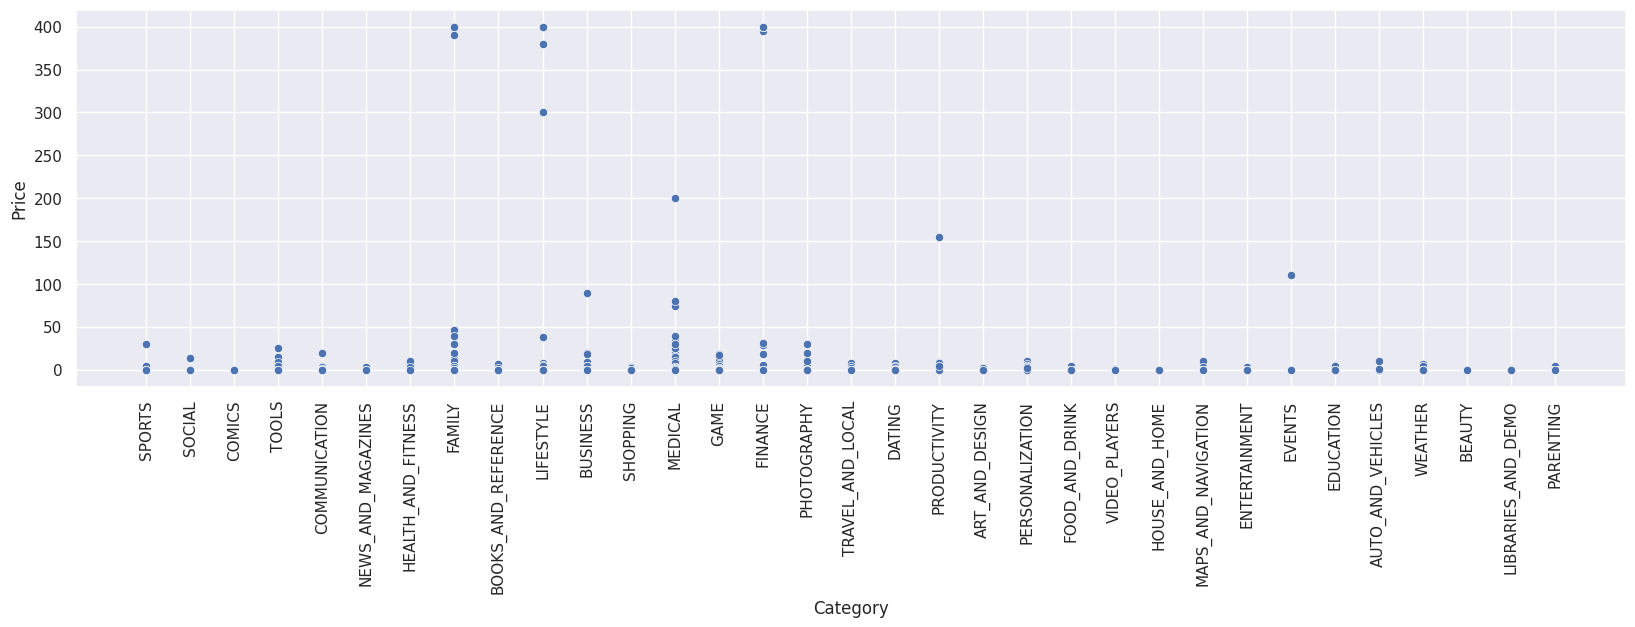

<Figure size 2000x500 with 0 Axes>

In [219]:

sns.scatterplot(x="Category", y="Price",data=play_store_df_1,palette="crest")

plt.xticks(rotation=90)
plt.figure(figsize=(20,5))
rcParams['figure.figsize'] = 20,5

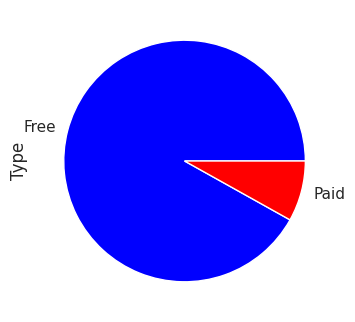

In [236]:
play_store_df_1['Type'].value_counts().plot.pie(colors={'red','blue'})

plt.show()


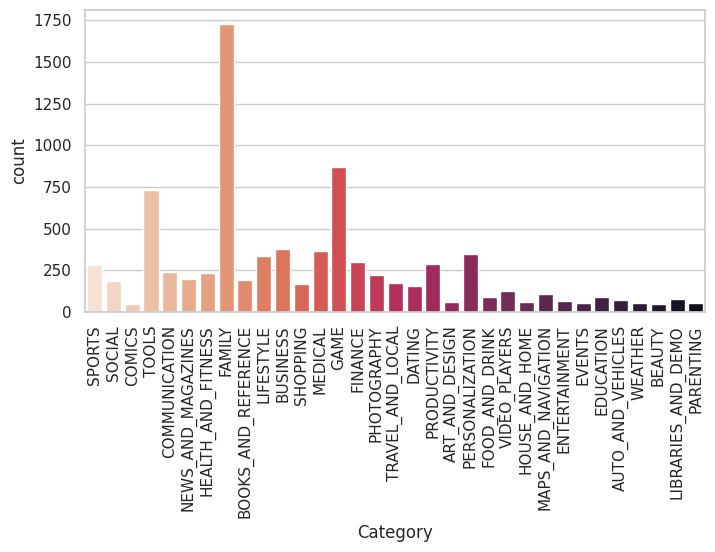

In [240]:
category_count=sns.countplot(x="Category",data=play_store_df_1,palette="rocket_r")
category_count.set_xticklabels(category_count.get_xticklabels(), rotation=90)
sns.set_style("whitegrid")

In [173]:
corr=play_store_df_1.corr()
corr

,Installs,Rating,Reviews,Size in MB,Price
Installs,1.000000,0.040592,0.597392,0.134210,-0.010146
Rating,0.040592,1.000000,0.061407,0.045535,-0.018632
Reviews,0.597392,0.061407,1.000000,0.179260,-0.008645
Size in MB,0.134210,0.045535,0.179260,1.000000,-0.022375
Price,-0.010146,-0.018632,-0.008645,-0.022375,1.000000


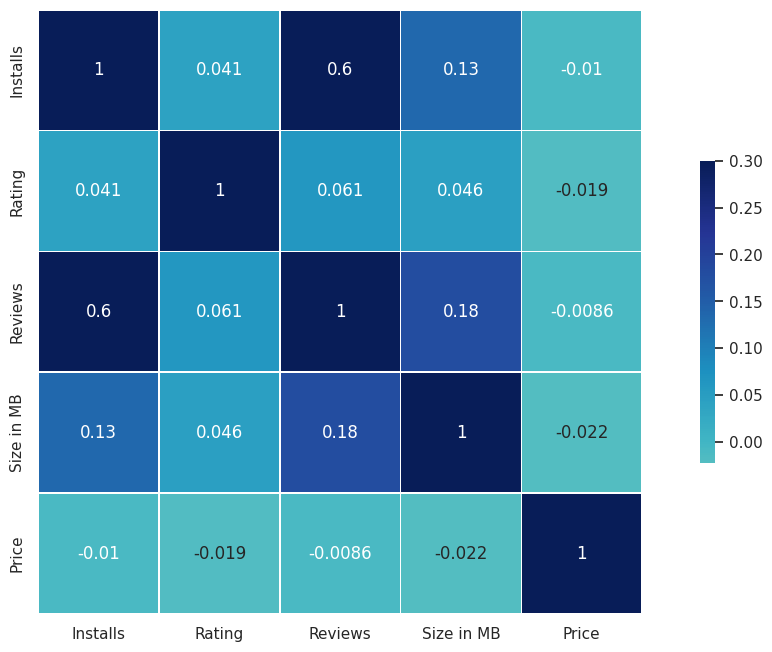

In [174]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr,  vmax=.3, center=0, cmap="YlGnBu",annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.gcf().set_size_inches(15, 8)

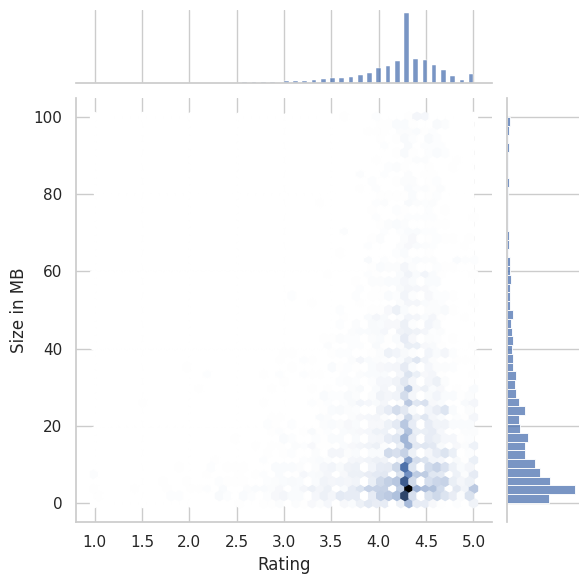

In [241]:
sns.jointplot(x = "Rating", y = "Size in MB",kind = "hex",color='B', data = play_store_df_1)

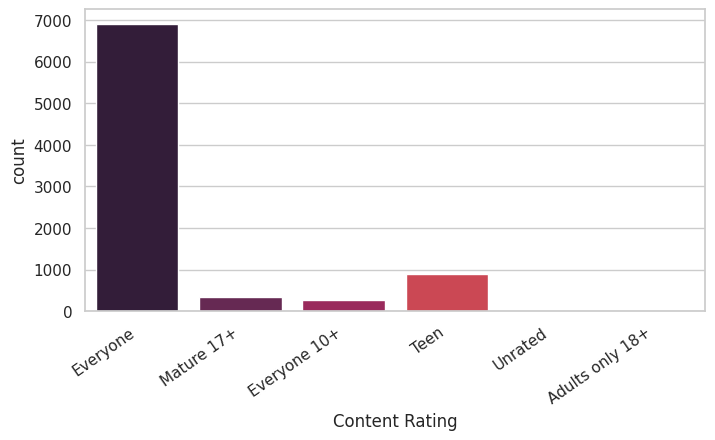

In [250]:
plt.figure(figsize=(8,4))
plt.xticks(rotation = 35, ha = 'right')
sns.countplot(x='Content Rating',data=play_store_df_1,palette="rocket")

<Figure size 2000x400 with 0 Axes>

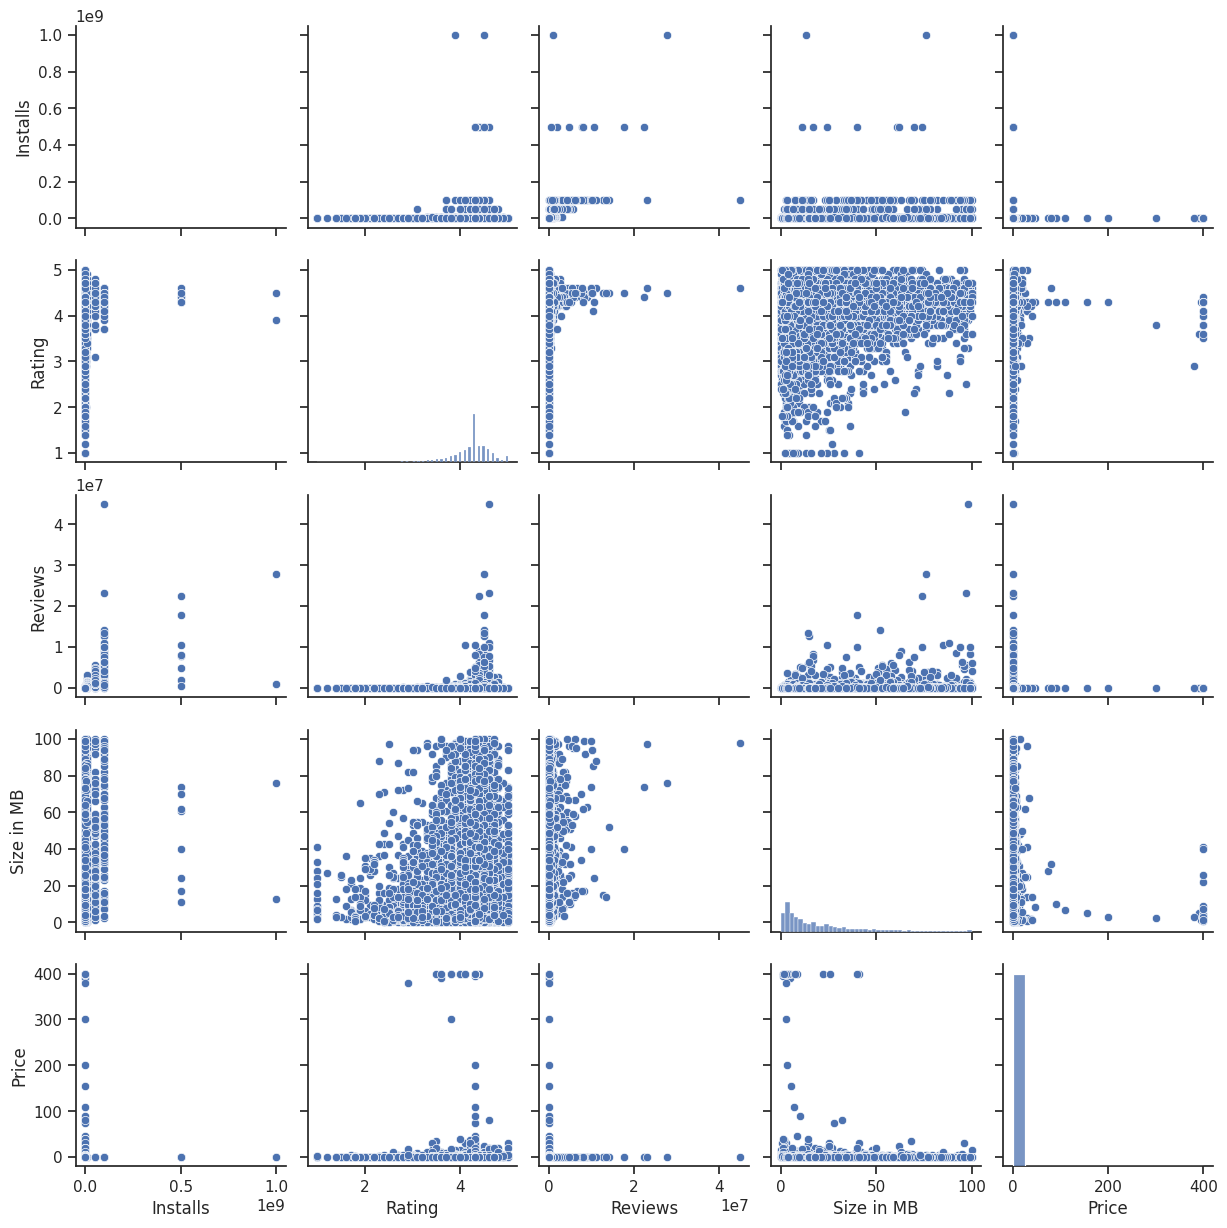

In [256]:
plt.figure(figsize=(20,4))
df = play_store_df_1
sns.pairplot(df)